In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle
from tqdm import tqdm
import os
from tqdm import tqdm_notebook
from multiprocessing import Pool

import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# this is hack, but who cares, use script as default folder
# otherwise the pickle doens't work
import sys
sys.path.insert(0, 'script')

import dataset as d
import models as m
import submission as s

### Plot basic

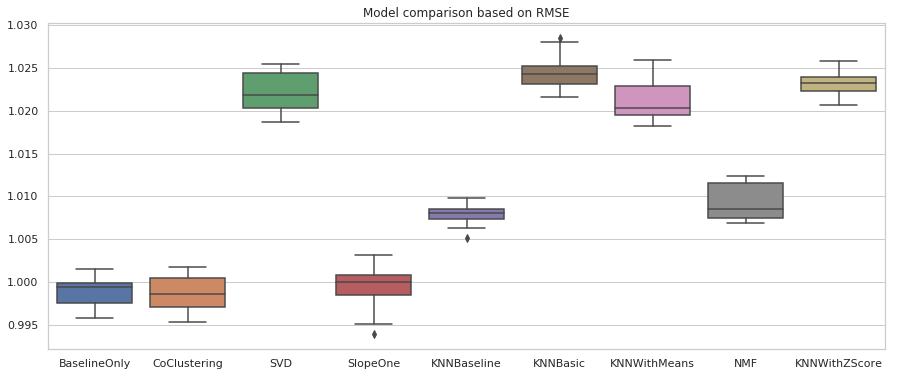

In [22]:
t = [
#("UserMean", [1.1535492333483148, 1.155402796446794, 1.156296082079693, 1.1547297677632955, 1.1509948935156111, 1.1543697184620474, 1.1540370175829362, 1.1535505129238481, 1.1549562398251392, 1.157516400371443, 1.1513352473423766, 1.1564254337587]),
#("GlobalMean", [1.1246051041677785, 1.1195421984150316, 1.1156272823438218, 1.1176678819588306, 1.1158979675806282, 1.1188446582381035, 1.1218900322010146, 1.1212272854149739, 1.117436433625455, 1.1233227896294997, 1.1134583728639682, 1.1191170437709879]),
#("MovieMean", [1.1160144127964495, 1.1184913973015738, 1.1175680554487883, 1.1201846335554577, 1.117236443061091, 1.11830296188701, 1.1174045677571685, 1.1192579149942778, 1.1216598970877703, 1.1204673409582857, 1.1215024791687036, 1.1205793070007424]),
#("ALS", [1.3378241669061246, 1.34282054338649, 1.3448295218264295, 1.3454500848828217, 1.3389349033011826, 1.3438703095342075, 1.3436932607221388, 1.3432384793779266, 1.345656121620661, 1.340901048045868, 1.3466367893320272, 1.3445972365203216]),
("BaselineOnly", [0.999547789590147, 0.9991742549379811, 0.9970825781533899, 1.0003789329681474, 0.9976669668229589, 0.9961491996509959, 1.0012931719367608, 1.0015222241116384, 0.9958011982435309, 0.9996802823667353, 0.999657963888919, 0.9978394033317035]),
("CoClustering", [0.9999836690367923, 1.001763769357786, 0.9988541976260565, 0.9969830391450604, 0.9982299224100056, 1.0003993478510176, 1.0006211609244078, 0.9962185460478552, 0.9981704638051504, 1.0015745024197775, 0.9970649753362706, 0.9953640030520594]), 
("SVD", [1.0198118119610542, 1.0211409092493398, 1.0229540698359028, 1.025503007116435, 1.0204760520482725, 1.0205187722895646, 1.02477085535674, 1.0243592519922935, 1.0224750614072762, 1.025294640766033, 1.0193936779973922, 1.0187289309421104]),
("SlopeOne", [0.9989595364245372, 0.9978433051705322, 1.0031529574467632, 0.9987145652082633, 1.000659078342973, 0.9950608676565778, 1.000450956243386, 1.0012749636730618, 0.9938646984846444, 1.0003040926535784, 0.9997792201697743, 1.0026355840877383]),
("KNNBaseline", [1.007542931140852, 1.0063184555454443, 1.0078893646628857, 1.0090971859679083, 1.0083629741643285, 1.0051829226470654, 1.0097868107628283, 1.0097857766261267, 1.0081411800518103, 1.008273904393929, 1.0079166635818335, 1.0068961698214074]),
("KNNBasic", [1.0285113481007155, 1.0227641842772508, 1.0246995756982393, 1.0219169019019931, 1.02592959961345, 1.021635608602195, 1.0246500206687397, 1.0249596692068939, 1.0238190734367734, 1.0233230487537952, 1.0279857632364737, 1.0238870204210022]),
("KNNWithMeans", [1.023060934496435, 1.0198085648915403, 1.0219468055060168, 1.0182709077982481, 1.0229017798486841, 1.0190774238909555, 1.0183498103270532, 1.0259612901859494, 1.0206089171498962, 1.0201504089822997, 1.0236060348313203, 1.019602822387846]),
("NMF",[1.008739779455674, 1.011584630914285, 1.011653726352268, 1.0068359562530889, 1.008318032700235, 1.0075544619789865, 1.0115572865911475, 1.012325090099819, 1.0103838545359125, 1.0073907492177343, 1.007373791217531, 1.0076463532158235]),
("KNNWithZScore", [1.0219129074290871, 1.0233960421286472, 1.0236344263259438, 1.023216674803362, 1.0224771918690583, 1.0232616904373066, 1.0257629358799638, 1.0206744048670302, 1.0251952558290904, 1.0223391409919385, 1.0247493188430927, 1.0223255756578673]),
#("MatrixFactor", [1.3602722660390163, 1.3694266662526717, 1.3694894302453344, 1.3731285544317073, 1.370628109460816, 1.3683468143713144, 1.3689200481587618, 1.3645967621665163, 1.368670217926328, 1.3687625533263927, 1.3747274279920016, 1.3661695853509628]),
]

plt.rcParams['figure.figsize'] = (15, 6)
ax = sns.boxplot(y=list(map(lambda x: x[1], t)),
                 x=list(map(lambda x: x[0], t)))
ax.set_xticklabels(labels=list(map(lambda x: x[0], t)), rotation=0)
plt.title('Model comparison based on RMSE')
plt.savefig('Model_Comparison_1')


In [23]:
BaselineOnly =  [0.999547789590147, 0.9991742549379811, 0.9970825781533899, 1.0003789329681474, 0.9976669668229589, 0.9961491996509959, 1.0012931719367608, 1.0015222241116384, 0.9958011982435309, 0.9996802823667353, 0.999657963888919, 0.9978394033317035]
CoClustering = [0.9999836690367923, 1.001763769357786, 0.9988541976260565, 0.9969830391450604, 0.9982299224100056, 1.0003993478510176, 1.0006211609244078, 0.9962185460478552, 0.9981704638051504, 1.0015745024197775, 0.9970649753362706, 0.9953640030520594] 
SVD = [1.0198118119610542, 1.0211409092493398, 1.0229540698359028, 1.025503007116435, 1.0204760520482725, 1.0205187722895646, 1.02477085535674, 1.0243592519922935, 1.0224750614072762, 1.025294640766033, 1.0193936779973922, 1.0187289309421104] 
SlopeOne = [0.9989595364245372, 0.9978433051705322, 1.0031529574467632, 0.9987145652082633, 1.000659078342973, 0.9950608676565778, 1.000450956243386, 1.0012749636730618, 0.9938646984846444, 1.0003040926535784, 0.9997792201697743, 1.0026355840877383]
KNNBaseline = [1.007542931140852, 1.0063184555454443, 1.0078893646628857, 1.0090971859679083, 1.0083629741643285, 1.0051829226470654, 1.0097868107628283, 1.0097857766261267, 1.0081411800518103, 1.008273904393929, 1.0079166635818335, 1.0068961698214074]
KNNBasic = [1.0285113481007155, 1.0227641842772508, 1.0246995756982393, 1.0219169019019931, 1.02592959961345, 1.021635608602195, 1.0246500206687397, 1.0249596692068939, 1.0238190734367734, 1.0233230487537952, 1.0279857632364737, 1.0238870204210022]
KNNWithMeans = [1.023060934496435, 1.0198085648915403, 1.0219468055060168, 1.0182709077982481, 1.0229017798486841, 1.0190774238909555, 1.0183498103270532, 1.0259612901859494, 1.0206089171498962, 1.0201504089822997, 1.0236060348313203, 1.019602822387846]
NMF =[1.008739779455674, 1.011584630914285, 1.011653726352268, 1.0068359562530889, 1.008318032700235, 1.0075544619789865, 1.0115572865911475, 1.012325090099819, 1.0103838545359125, 1.0073907492177343, 1.007373791217531, 1.0076463532158235]
KNNWithZScore = [1.0219129074290871, 1.0233960421286472, 1.0236344263259438, 1.023216674803362, 1.0224771918690583, 1.0232616904373066, 1.0257629358799638, 1.0206744048670302, 1.0251952558290904, 1.0223391409919385, 1.0247493188430927, 1.0223255756578673]



In [36]:
min(NMF)

1.0068359562530889

## Plot blending

In [3]:
results = [
    0.9902513322324573, 
    0.9922650034590907, 
    0.9892089833291676, 
    0.9885649735620685, 
    0.9911767747726746, 
    0.9915589380031385, 
    0.9949956398567036,
    0.9940916949044046, 
    0.9885318098318964, 
    0.996021219008336, 
    0.9882160000645653, 
    0.9916305831813942
]

[Text(0,0,'blending')]

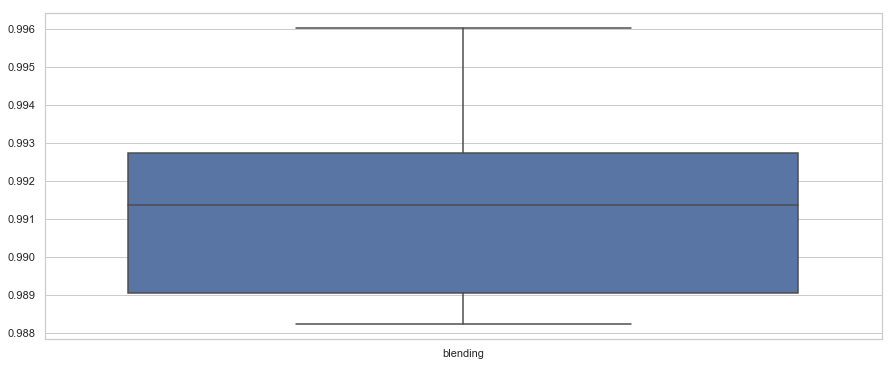

In [6]:
plt.rcParams['figure.figsize'] = (15, 6)
ax = sns.boxplot(y=[results],
                 x=['blending'])
ax.set_xticklabels(labels=['blending'], rotation=0)